In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

<Axes: title={'center': 'Simulated data'}, xlabel='X', ylabel='Y'>

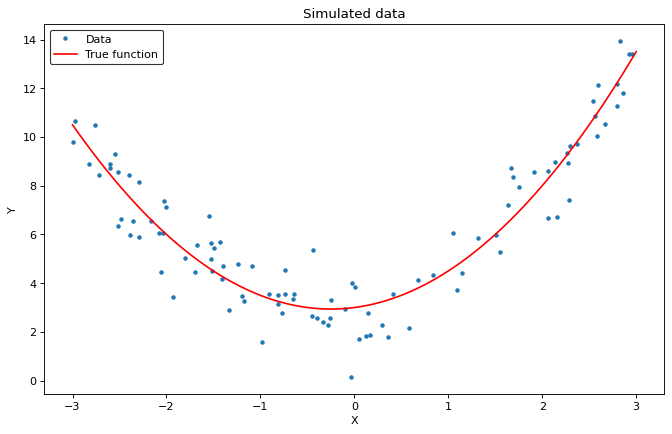

In [14]:
# simulate data 
#np.random.seed(0) # for reproducibility this is producing the same data as in the book 0 stands for the seed value 
# wich is used to generate the random numbers
samples = 100
X = np.random.uniform(-3, 3, (samples, 1)) # 100 random numbers between -3 and 3
f = lambda x: x**2 + 0.5*x + 3 # the function we are trying to estimate
y = f(X) + np.random.randn(100, 1) # the data we are trying to estimate

# plot the data

def plot_data():
    fig = plt.figure(figsize=(10, 6), dpi=80)
    ax = plt.axes()
    ax.plot(X, y, '.', label='Data')

    x = np.linspace(-3, 3, samples)
    ax.plot(x, f(x), 'r', label='True function')

    ax.set(title = 'Simulated data', xlabel='X', ylabel='Y')
    ax.legend(edgecolor='black')

    return ax

plot_data()


In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
X_poly[:4]

array([[-2.51680798,  6.3343224 ],
       [-2.48813446,  6.1908131 ],
       [-1.67162132,  2.79431784],
       [-2.39991563,  5.75959505]])

In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_poly, y) # fit the model with polynomial features
model.intercept_, model.coef_

(array([2.94780187]), array([[0.49906929, 0.9999207 ]]))

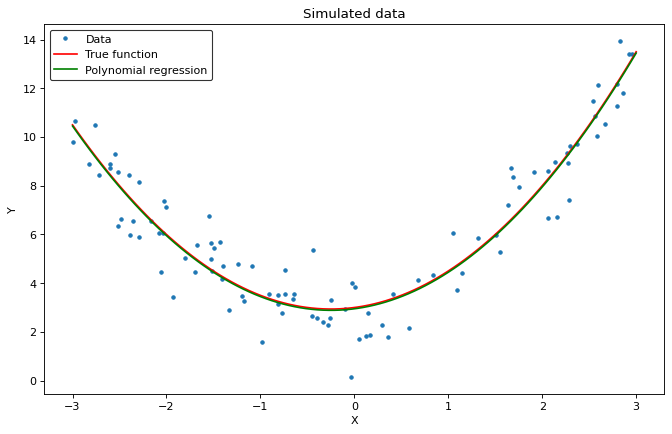

In [18]:
x = np.linspace(-3, 3, samples)
x_poly_feat = poly.transform(x.reshape(-1, 1)) # transform the x values to polynomial features reshape is used to make it 2D otherwise it will give an error because it is expecting a 2D array
pred = model.predict(x_poly_feat)

ax = plot_data()
ax.plot(x, pred, 'g', label='Polynomial regression')
ax.legend(edgecolor='black')